In [1]:
import tensorflow as tf

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [22]:
import pandas as pd
import numpy as np

In [89]:
btc = pd.read_csv("data/BTC-USD.csv",
             parse_dates=["Date"],
                 index_col=["Date"])

btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [115]:
btc["2014-09"]

C:\Users\Sykkuno\AppData\Local\Temp\ipykernel_12852\706006884.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  btc["2014-09"]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400


In [5]:
`btc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207
2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322
2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566
2023-01-06,16836.472656,16991.994141,16716.421875,16951.968750,16951.968750,14413662913
2023-01-07,16948.787109,16975.017578,16929.478516,16950.582031,16950.582031,13550465024


In [6]:
import seaborn as sns

<AxesSubplot: xlabel='Date', ylabel='Open'>

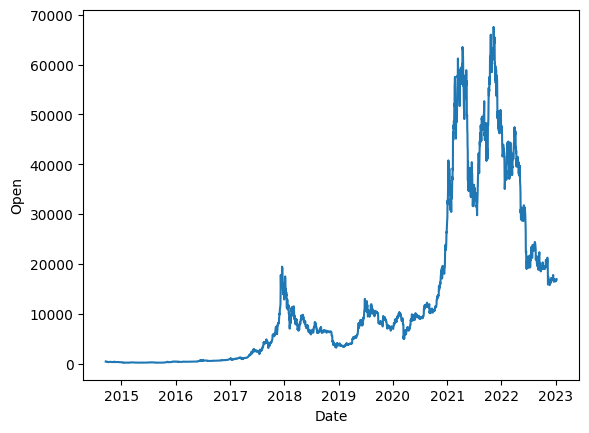

In [7]:
sns.lineplot(btc["Open"])

<AxesSubplot: xlabel='Date', ylabel='Close'>

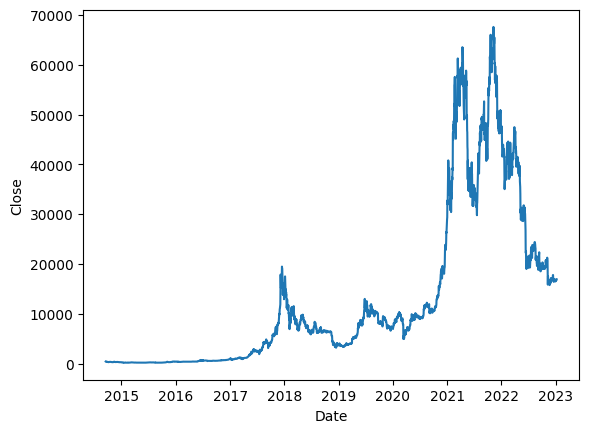

In [8]:
sns.lineplot(btc["Close"])

<AxesSubplot: xlabel='Date', ylabel='High'>

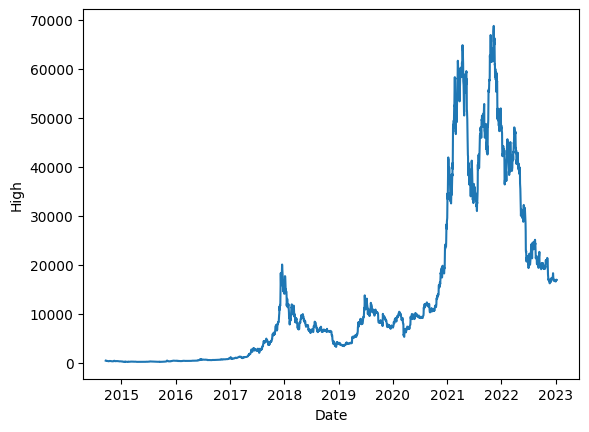

In [9]:
sns.lineplot(btc["High"])

<AxesSubplot: xlabel='Date', ylabel='Close'>

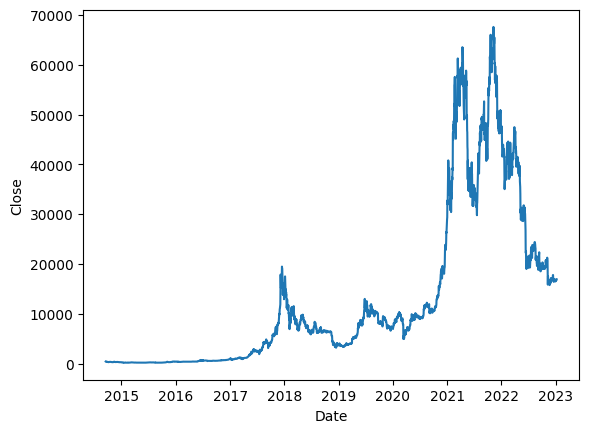

In [10]:
sns.lineplot(btc["Close"])

<AxesSubplot: xlabel='Date', ylabel='Volume'>

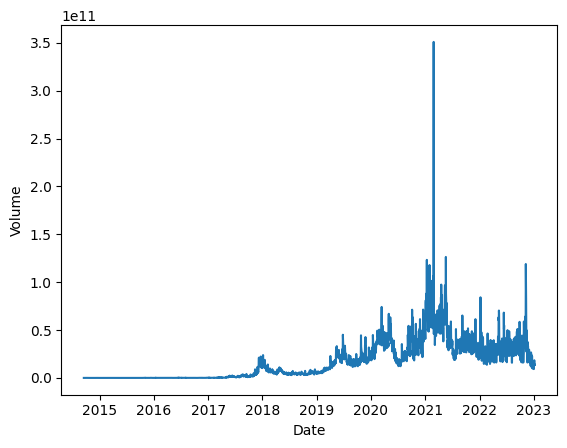

In [11]:
sns.lineplot(btc["Volume"])

In [12]:
btc.shape

(3035, 6)

In [131]:
btc_data = pd.DataFrame(btc["Close"].rename("Price"))
btc_data.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [132]:
# Block reward values
block_reward_1, block_reward_2, block_reward_3, block_reward_4 = 50, 25, 12.5, 6.25 

# Block reward dates (datetime form of the above date stamps)
block_reward_1_datetime = np.datetime64("2014-09-17")
block_reward_2_datetime = np.datetime64("2015-11-28")
block_reward_3_datetime = np.datetime64("2017-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

block_reward_1_days = (block_reward_2_datetime - btc_data.index[0]).days
block_reward_2_days = (block_reward_3_datetime - btc_data.index[0]).days
block_reward_3_days = (block_reward_4_datetime - btc_data.index[0]).days

In [134]:
bitcoin_prices_block = btc_data.copy()
bitcoin_prices_block["Block Reward"] = None

bitcoin_prices_block.iloc[:block_reward_1_days, -1] = block_reward_1
bitcoin_prices_block.iloc[block_reward_1_days : block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days : block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days :, -1] = block_reward_4
bitcoin_prices_block

,Price,Block Reward
Date,,
2014-09-17,457.334015,50
2014-09-18,424.440002,50
2014-09-19,394.795990,50
2014-09-20,408.903992,50
2014-09-21,398.821014,50
...,...,...
2023-01-03,16679.857422,6.25
2023-01-04,16863.238281,6.25
2023-01-05,16836.736328,6.25


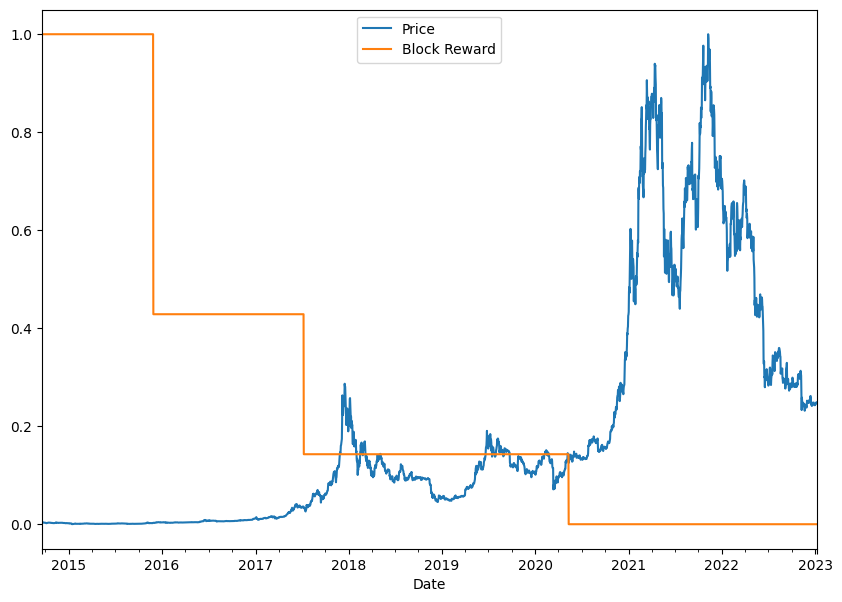

In [135]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "Block Reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [152]:
WINDOW = 15
HORIZON = 1

In [153]:
bitcoin_prices_window = bitcoin_prices_block.copy()
bitcoin_prices_window.head()

,Price,Block Reward
Date,,
2014-09-17,457.334015,50
2014-09-18,424.440002,50
2014-09-19,394.795990,50
2014-09-20,408.903992,50
2014-09-21,398.821014,50


In [157]:
for i in range(WINDOW):
    bitcoin_prices_window[f"Pice {i+1}"] = bitcoin_prices_window["Price"].shift(periods=i+1)
bitcoin_prices_window.head(16)

,Price,Block Reward,Pice 1,Pice 2,Pice 3,Pice 4,Pice 5,Pice 6,Pice 7,Pice 8,Pice 9,Pice 10,Pice 11,Pice 12,Pice 13,Pice 14,Pice 15
Date,,,,,,,,,,,,,,,,,
2014-09-17,457.334015,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,50,457.334015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,50,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,50,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,398.821014,50,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-22,402.152008,50,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-23,435.790985,50,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-24,423.204987,50,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-25,411.574005,50,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
X = bitcoin_prices_window.dropna().drop(["Price"], axis=1).astype("float32")
Y = bitcoin_prices_window.dropna()["Price"].astype("float32")
X.shape, Y.shape

((3020, 16), (3020,))

In [193]:
X = bitcoin_prices_window.dropna().drop(["Price"], axis=1, index=None).astype("float32")

In [168]:
def create_train_test_splits(windows, horizons, test_split=0.2):
    """ 
    Return train_windows, test_windows, train_horizons, test_horizons
    """
    split_size = int(len(windows) * (1-test_split))
    
    train_windows = windows[: split_size]
    train_labels = horizons[: split_size]
    
    test_windows = windows[split_size :]
    test_labels =horizons[split_size :]
    
    return train_windows, test_windows, train_labels, test_labels

In [169]:
train_windows, test_windows, train_labels, test_labels = create_train_test_splits(X, Y, test_split=0.15)

In [174]:
print(f"Trining Data Shape window->{train_windows.shape}, labels->{train_labels.shape} \nTesting Data Shape window->{test_windows.shape}, labels->{test_labels.shape}")

Trining Data Shape window->(2567, 16), labels->(2567,) 
Testing Data Shape window->(453, 16), labels->(453,)


In [224]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Creating a model Checkpoint function

checkpoint_callback = ModelCheckpoint(filepath="models/bitcoin_model/",
                                     monitor="val_loss", 
                                    save_best_only=True,
                                     save_freq="epoch")

In [234]:
tf.random.set_seed(42)

# Creating the Model
ip = tf.keras.layers.Input(shape=(WINDOW+1))
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(ip)
x = tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation="relu", padding="causal")(x)
x = tf.keras.layers.LSTM(128, activation="relu")(x)
op = tf.keras.layers.Dense(HORIZON)(x)

model = tf.keras.Model(ip, op)

# Compiling the Model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [235]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 16)]              0         
                                                                 
 lambda_15 (Lambda)          (None, 1, 16)             0         
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 128)            10368     
                                                                 
 lstm_15 (LSTM)              (None, 128)               131584    
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 142,081
Trainable params: 142,081
Non-trainable params: 0
_________________________________________________________________


In [236]:
model.fit(x=train_windows, y=train_labels,
         batch_size=128, epochs=100,
         validation_data=(test_windows, test_labels),
         callbacks=[checkpoint_callback])

Epoch 1/100
19/21 [==========================>...] - ETA: 0s - loss: 5680.6060

INFO:tensorflow:Assets written to: models/bitcoin_model\assets


INFO:tensorflow:Assets written to: models/bitcoin_model\assets


21/21 [==============================] - 4s 145ms/step - loss: 5453.1519 - val_loss: 2446.5791
Epoch 2/100
20/21 [===========================>..] - ETA: 0s - loss: 974.7797

INFO:tensorflow:Assets written to: models/bitcoin_model\assets


INFO:tensorflow:Assets written to: models/bitcoin_model\assets


21/21 [==============================] - 2s 117ms/step - loss: 974.8314 - val_loss: 2381.0320
Epoch 3/100
21/21 [==============================] - 0s 14ms/step - loss: 799.0627 - val_loss: 2388.6055
Epoch 4/100
21/21 [==============================] - 0s 13ms/step - loss: 727.7687 - val_loss: 2432.4172
Epoch 5/100
21/21 [==============================] - ETA: 0s - loss: 666.1105

INFO:tensorflow:Assets written to: models/bitcoin_model\assets


INFO:tensorflow:Assets written to: models/bitcoin_model\assets


21/21 [==============================] - 2s 122ms/step - loss: 666.1105 - val_loss: 1625.3000
Epoch 6/100
21/21 [==============================] - 0s 15ms/step - loss: 621.1338 - val_loss: 1770.7603
Epoch 7/100
20/21 [===========================>..] - ETA: 0s - loss: 584.7527

INFO:tensorflow:Assets written to: models/bitcoin_model\assets


INFO:tensorflow:Assets written to: models/bitcoin_model\assets


21/21 [==============================] - 2s 107ms/step - loss: 585.5717 - val_loss: 1454.8538
Epoch 8/100
21/21 [==============================] - 0s 12ms/step - loss: 558.2908 - val_loss: 1724.0746
Epoch 9/100
21/21 [==============================] - 0s 12ms/step - loss: 528.9229 - val_loss: 2127.0891
Epoch 10/100
21/21 [==============================] - 0s 10ms/step - loss: 535.2122 - val_loss: 1862.4170
Epoch 11/100
15/21 [====================>.........] - ETA: 0s - loss: 505.8362

INFO:tensorflow:Assets written to: models/bitcoin_model\assets


INFO:tensorflow:Assets written to: models/bitcoin_model\assets


21/21 [==============================] - 2s 92ms/step - loss: 502.3675 - val_loss: 1221.7562
Epoch 12/100
19/21 [==========================>...] - ETA: 0s - loss: 518.9806

INFO:tensorflow:Assets written to: models/bitcoin_model\assets


INFO:tensorflow:Assets written to: models/bitcoin_model\assets


21/21 [==============================] - 2s 98ms/step - loss: 519.0167 - val_loss: 1193.5823
Epoch 13/100
21/21 [==============================] - 0s 12ms/step - loss: 464.3370 - val_loss: 1820.4684
Epoch 14/100
21/21 [==============================] - ETA: 0s - loss: 522.4064

INFO:tensorflow:Assets written to: models/bitcoin_model\assets


INFO:tensorflow:Assets written to: models/bitcoin_model\assets


21/21 [==============================] - 3s 130ms/step - loss: 522.4064 - val_loss: 1158.1212
Epoch 15/100
21/21 [==============================] - 0s 12ms/step - loss: 464.1930 - val_loss: 1405.2460
Epoch 16/100
21/21 [==============================] - 0s 12ms/step - loss: 448.3794 - val_loss: 1241.2302
Epoch 17/100
21/21 [==============================] - 0s 10ms/step - loss: 434.9450 - val_loss: 1483.4855
Epoch 18/100
21/21 [==============================] - 0s 10ms/step - loss: 472.4257 - val_loss: 1256.7073
Epoch 19/100
21/21 [==============================] - 0s 10ms/step - loss: 440.7311 - val_loss: 1165.8737
Epoch 20/100
21/21 [==============================] - 0s 9ms/step - loss: 423.9253 - val_loss: 1706.0178
Epoch 21/100
21/21 [==============================] - 0s 9ms/step - loss: 474.0742 - val_loss: 1362.5443
Epoch 22/100
21/21 [==============================] - 0s 9ms/step - loss: 409.5657 - val_loss: 1378.0121
Epoch 23/100
21/21 [==============================] - 0s 9ms/

INFO:tensorflow:Assets written to: models/bitcoin_model\assets


INFO:tensorflow:Assets written to: models/bitcoin_model\assets


21/21 [==============================] - 2s 90ms/step - loss: 403.1076 - val_loss: 1087.8400
Epoch 25/100
20/21 [===========================>..] - ETA: 0s - loss: 383.8636

INFO:tensorflow:Assets written to: models/bitcoin_model\assets


INFO:tensorflow:Assets written to: models/bitcoin_model\assets


21/21 [==============================] - 2s 97ms/step - loss: 384.9736 - val_loss: 1024.1537
Epoch 26/100
21/21 [==============================] - ETA: 0s - loss: 376.3757

INFO:tensorflow:Assets written to: models/bitcoin_model\assets


INFO:tensorflow:Assets written to: models/bitcoin_model\assets


21/21 [==============================] - 2s 92ms/step - loss: 376.3757 - val_loss: 1007.4592
Epoch 27/100
21/21 [==============================] - 0s 14ms/step - loss: 406.9801 - val_loss: 1167.0226
Epoch 28/100
21/21 [==============================] - 0s 9ms/step - loss: 422.4008 - val_loss: 1035.0587
Epoch 29/100
21/21 [==============================] - 0s 9ms/step - loss: 374.7490 - val_loss: 2020.6682
Epoch 30/100
21/21 [==============================] - ETA: 0s - loss: 481.6631

INFO:tensorflow:Assets written to: models/bitcoin_model\assets


INFO:tensorflow:Assets written to: models/bitcoin_model\assets


21/21 [==============================] - 2s 86ms/step - loss: 481.6631 - val_loss: 1001.2098
Epoch 31/100
21/21 [==============================] - 0s 13ms/step - loss: 407.0847 - val_loss: 1349.0226
Epoch 32/100
15/21 [====================>.........] - ETA: 0s - loss: 385.6251

INFO:tensorflow:Assets written to: models/bitcoin_model\assets


INFO:tensorflow:Assets written to: models/bitcoin_model\assets


21/21 [==============================] - 2s 90ms/step - loss: 382.6850 - val_loss: 967.2893
Epoch 33/100
21/21 [==============================] - 0s 13ms/step - loss: 352.7443 - val_loss: 1275.4556
Epoch 34/100
21/21 [==============================] - 0s 8ms/step - loss: 443.4258 - val_loss: 1741.8350
Epoch 35/100
21/21 [==============================] - 0s 9ms/step - loss: 363.8616 - val_loss: 1932.1936
Epoch 36/100
21/21 [==============================] - 0s 9ms/step - loss: 464.0281 - val_loss: 972.2274
Epoch 37/100
21/21 [==============================] - 0s 9ms/step - loss: 391.0042 - val_loss: 984.6859
Epoch 38/100
21/21 [==============================] - 0s 9ms/step - loss: 343.3490 - val_loss: 1108.6820
Epoch 39/100
17/21 [=======================>......] - ETA: 0s - loss: 373.1831

INFO:tensorflow:Assets written to: models/bitcoin_model\assets


INFO:tensorflow:Assets written to: models/bitcoin_model\assets


21/21 [==============================] - 2s 93ms/step - loss: 358.2289 - val_loss: 933.5244
Epoch 40/100
21/21 [==============================] - 0s 9ms/step - loss: 343.8056 - val_loss: 1015.5334
Epoch 41/100
21/21 [==============================] - 0s 10ms/step - loss: 337.0840 - val_loss: 1287.8812
Epoch 42/100
21/21 [==============================] - 0s 10ms/step - loss: 413.7214 - val_loss: 1577.6742
Epoch 43/100
20/21 [===========================>..] - ETA: 0s - loss: 442.2609

INFO:tensorflow:Assets written to: models/bitcoin_model\assets


INFO:tensorflow:Assets written to: models/bitcoin_model\assets


21/21 [==============================] - 2s 88ms/step - loss: 441.9591 - val_loss: 931.7108
Epoch 44/100
21/21 [==============================] - 0s 10ms/step - loss: 353.7528 - val_loss: 1055.1718
Epoch 45/100
21/21 [==============================] - 0s 9ms/step - loss: 378.1684 - val_loss: 1270.9672
Epoch 46/100
21/21 [==============================] - 0s 9ms/step - loss: 345.6092 - val_loss: 1105.7330
Epoch 47/100
21/21 [==============================] - 0s 8ms/step - loss: 343.8520 - val_loss: 1313.1111
Epoch 48/100
15/21 [====================>.........] - ETA: 0s - loss: 337.7615

INFO:tensorflow:Assets written to: models/bitcoin_model\assets


INFO:tensorflow:Assets written to: models/bitcoin_model\assets


21/21 [==============================] - 2s 83ms/step - loss: 331.3271 - val_loss: 885.0005
Epoch 49/100
21/21 [==============================] - 0s 14ms/step - loss: 336.7439 - val_loss: 2273.9424
Epoch 50/100
21/21 [==============================] - 0s 8ms/step - loss: 536.4426 - val_loss: 1228.1713
Epoch 51/100
21/21 [==============================] - 0s 8ms/step - loss: 514.3915 - val_loss: 2324.6738
Epoch 52/100
21/21 [==============================] - 0s 8ms/step - loss: 553.5798 - val_loss: 923.2836
Epoch 53/100
21/21 [==============================] - 0s 9ms/step - loss: 444.0931 - val_loss: 1919.9435
Epoch 54/100
21/21 [==============================] - 0s 9ms/step - loss: 517.3506 - val_loss: 973.1039
Epoch 55/100
21/21 [==============================] - 0s 8ms/step - loss: 351.1031 - val_loss: 1232.4548
Epoch 56/100
21/21 [==============================] - 0s 9ms/step - loss: 361.5123 - val_loss: 927.3164
Epoch 57/100
21/21 [==============================] - 0s 9ms/step - lo

INFO:tensorflow:Assets written to: models/bitcoin_model\assets


INFO:tensorflow:Assets written to: models/bitcoin_model\assets


21/21 [==============================] - 2s 88ms/step - loss: 319.1408 - val_loss: 875.9581
Epoch 66/100
21/21 [==============================] - 0s 9ms/step - loss: 314.3880 - val_loss: 979.7674
Epoch 67/100
21/21 [==============================] - 0s 9ms/step - loss: 321.2244 - val_loss: 1162.4999
Epoch 68/100
21/21 [==============================] - 0s 9ms/step - loss: 360.7108 - val_loss: 1169.2523
Epoch 69/100
21/21 [==============================] - 0s 9ms/step - loss: 337.2006 - val_loss: 1117.3812
Epoch 70/100
17/21 [=======================>......] - ETA: 0s - loss: 331.9143

INFO:tensorflow:Assets written to: models/bitcoin_model\assets


INFO:tensorflow:Assets written to: models/bitcoin_model\assets


21/21 [==============================] - 2s 95ms/step - loss: 341.6059 - val_loss: 864.1213
Epoch 71/100
21/21 [==============================] - 0s 16ms/step - loss: 395.7683 - val_loss: 905.7706
Epoch 72/100
21/21 [==============================] - 0s 9ms/step - loss: 358.2205 - val_loss: 1211.9587
Epoch 73/100
21/21 [==============================] - 0s 9ms/step - loss: 371.0144 - val_loss: 976.7902
Epoch 74/100
21/21 [==============================] - 0s 9ms/step - loss: 351.1301 - val_loss: 1313.8256
Epoch 75/100
21/21 [==============================] - 0s 8ms/step - loss: 327.6867 - val_loss: 1247.9968
Epoch 76/100
21/21 [==============================] - 0s 9ms/step - loss: 335.7247 - val_loss: 881.4964
Epoch 77/100
21/21 [==============================] - 0s 9ms/step - loss: 311.7413 - val_loss: 1300.0277
Epoch 78/100
21/21 [==============================] - 0s 9ms/step - loss: 374.7215 - val_loss: 994.4524
Epoch 79/100
15/21 [====================>.........] - ETA: 0s - loss: 3

INFO:tensorflow:Assets written to: models/bitcoin_model\assets


INFO:tensorflow:Assets written to: models/bitcoin_model\assets


21/21 [==============================] - 2s 89ms/step - loss: 312.1263 - val_loss: 854.9894
Epoch 80/100
21/21 [==============================] - ETA: 0s - loss: 313.0233

INFO:tensorflow:Assets written to: models/bitcoin_model\assets


INFO:tensorflow:Assets written to: models/bitcoin_model\assets


21/21 [==============================] - 3s 151ms/step - loss: 313.0233 - val_loss: 842.8079
Epoch 81/100
21/21 [==============================] - 0s 11ms/step - loss: 309.4714 - val_loss: 1080.6909
Epoch 82/100
21/21 [==============================] - 0s 9ms/step - loss: 384.7853 - val_loss: 1722.6383
Epoch 83/100
21/21 [==============================] - 0s 9ms/step - loss: 472.4921 - val_loss: 1125.5115
Epoch 84/100
21/21 [==============================] - 0s 9ms/step - loss: 331.5714 - val_loss: 1027.7806
Epoch 85/100
21/21 [==============================] - 0s 10ms/step - loss: 320.6068 - val_loss: 849.3368
Epoch 86/100
21/21 [==============================] - 0s 9ms/step - loss: 309.9990 - val_loss: 986.3970
Epoch 87/100
21/21 [==============================] - 0s 9ms/step - loss: 343.6581 - val_loss: 937.5199
Epoch 88/100
21/21 [==============================] - 0s 9ms/step - loss: 310.3434 - val_loss: 858.2377
Epoch 89/100
21/21 [==============================] - 0s 10ms/step - 

In [237]:
model.evaluate(test_windows, test_labels)

15/15 [==============================] - 0s 6ms/step - loss: 920.8932


920.8931884765625

In [238]:
# Load the best fit model
model = tf.keras.models.load_model("models/bitcoin_model/")
model.evaluate(test_windows, test_labels)

15/15 [==============================] - 0s 5ms/step - loss: 842.8082


842.8081665039062

In [263]:
y_preds = model.predict(test_windows)
y_preds[:10]

15/15 [==============================] - 0s 4ms/step


array([[56486.78 ],
       [56301.008],
       [56775.035],
       [57567.875],
       [59942.035],
       [61029.57 ],
       [61290.973],
       [61919.125],
       [63684.17 ],
       [65165.594]], dtype=float32)

In [265]:
y_preds.shape, test_labels.shape

((453, 1), (453,))

In [276]:
def plot_data_time(y_true, y_preds):
    import matplotlib.pyplot as plt
    import seaborn as sns
    y_preds = tf.squeeze(y_preds)
    temp = {"Actual": y_true,
           "Predicted": y_preds}
    df = pd.DataFrame(temp)
    sns.lineplot(df)
    plt.xticks(rotation=45);    

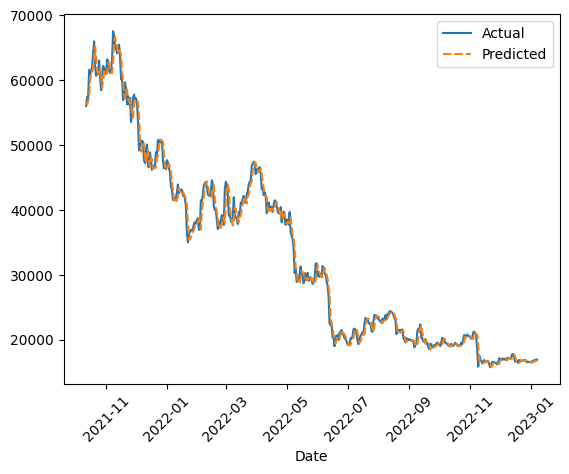

In [277]:
plot_data_time(test_labels, y_preds)

In [318]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanAbsoluteScaledError
import numpy as np
def all_metrics(y_true, y_preds, y_train):
    """y_true, y_preds, y_train"""
    m = {}
    m["MAE"] = mean_absolute_error(y_true, y_preds)
    m["MSE"] = np.sqrt(mean_absolute_error(y_true, y_preds))
    m["MAPE"] = mean_absolute_percentage_error(y_true, y_preds)
    y_train = pd.DataFrame(y_train)
    y_preds = pd.DataFrame(y_preds)
    mase = MeanAbsoluteScaledError()
    m["MASE"] = mase(y_true, y_preds, y_train=y_train)
    return m

In [320]:
model_evaluation = all_metrics(test_labels, y_preds, test_horizons)    
model_evaluation

C:\Users\Sykkuno\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\performance_metrics\forecasting\_classes.py:411: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
C:\Users\Sykkuno\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\performance_metrics\forecasting\_classes.py:422: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


{'MAE': 842.8081,
 'MSE': 29.031158,
 'MAPE': 0.024835106,
 'MASE': 1.0934731586663857}